In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error
import h2o
from h2o.automl import H2OAutoML
import math

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [21]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: generate_datasets.ipynb
  File: generate_dataset_hgb.ipynb
  File: generate_dataset_automl.ipynb
  File: generate_dataset_gradboost.ipynb
  File: gradboost_testing_features.ipynb


In [22]:
# pv_measurement for all training and validation rows
a_targets = pd.read_parquet('../data/A/train_targets.parquet')
b_targets = pd.read_parquet('../data/B/train_targets.parquet')
c_targets = pd.read_parquet('../data/C/train_targets.parquet')

# validation sets
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')

# training sets
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

#test sets
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')

### Groups the rows with the same hour for location A

In [23]:
df = X_test_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_A = df


df = X_train_observed_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_A = df


df = X_train_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_A = df

### Groups the rows with the same hour for location B

In [24]:
df = X_test_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_B = df


df = X_train_observed_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_B = df


df = X_train_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_B = df

### Groups the rows with the same hour for location C

In [25]:
df = X_test_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_C = df


df = X_train_observed_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_C = df


df = X_train_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_C = df

#### Merging the training and validation set with the targets sets such that pv_measurement is added

In [26]:
training_A = training_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_A.drop('time', axis=1, inplace=True)

training_B = training_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_B.drop('time', axis=1, inplace=True)

training_C = training_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_C.drop('time', axis=1, inplace=True)

validation_A = validation_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_A.drop('time', axis=1, inplace=True)

validation_B = validation_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_B.drop('time', axis=1, inplace=True)

validation_C = validation_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_C.drop('time', axis=1, inplace=True)

Training B har 4 nan's for pv_m. Training C har 6000 nan's for pv_m

In [27]:
training_A['pv_measurement'] = training_A['pv_measurement'].replace(-0.0, 0.0)
training_B['pv_measurement'] = training_B['pv_measurement'].replace(-0.0, 0.0)
training_C['pv_measurement'] = training_C['pv_measurement'].replace(-0.0, 0.0)
validation_C['pv_measurement'] = validation_C['pv_measurement'].replace(-0.0, 0.0)
validation_A['pv_measurement'] = validation_A['pv_measurement'].replace(-0.0, 0.0)
validation_B['pv_measurement'] = validation_B['pv_measurement'].replace(-0.0, 0.0)

#### Plotting pv_measurement for all dataframes

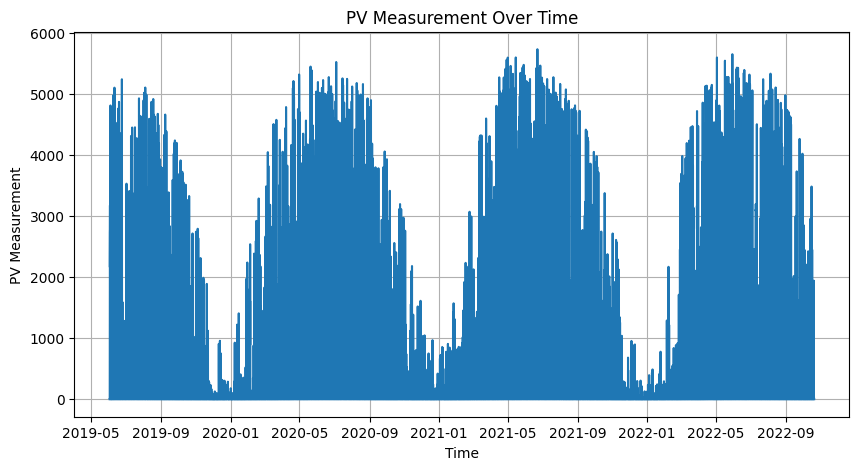

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(training_A['date_forecast'], training_A['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

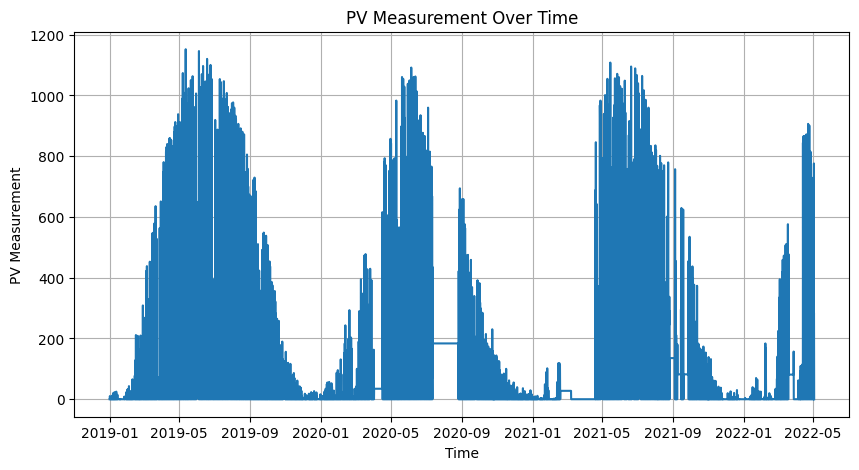

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(training_B['date_forecast'], training_B['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

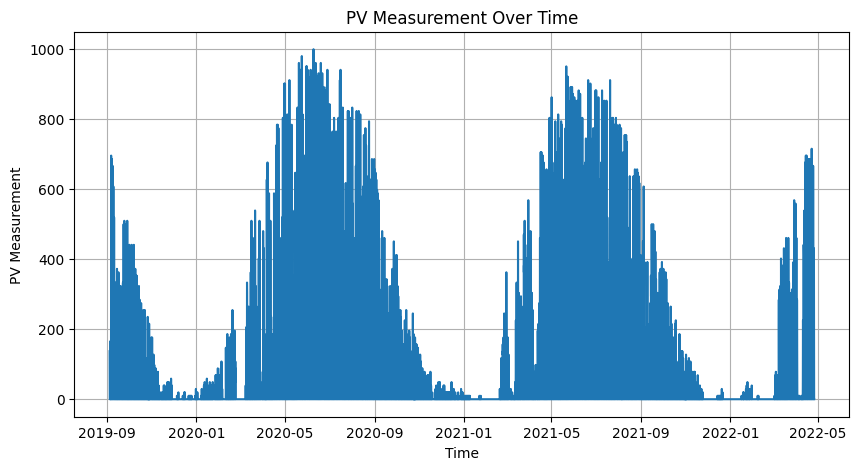

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(training_C['date_forecast'], training_C['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

Her må vi sette inn verdier for 2019; gjennomsnitt av andre år med samme dato ellers

In [31]:
#training_C['pv_measurement'].fillna(1000, inplace=True)

In [32]:
training_C.dropna(subset=['pv_measurement'], inplace=True)
training_B.dropna(subset=['pv_measurement'], inplace=True)

In [33]:
nan_count = training_A.isna().sum()
#print(nan_count)

dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    if 'snow_density:kgm3' in df.columns:
        df.drop(columns=['snow_density:kgm3'], inplace=True)
        df.drop(columns=['ceiling_height_agl:m'], inplace=True)
        df.drop(columns=['cloud_base_agl:m'], inplace=True)

#### Adds features for day, month, hour

In [34]:
dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    df['month'] = df['date_forecast'].dt.month
    df['day'] = df['date_forecast'].dt.day
    df['hour'] = df['date_forecast'].dt.hour

    df['month'] = df['date_forecast'].dt.month
    df['day'] = df['date_forecast'].dt.day
    df['hour'] = df['date_forecast'].dt.hour

    df['month'] = df['date_forecast'].dt.month
    df['day'] = df['date_forecast'].dt.day
    df['hour'] = df['date_forecast'].dt.hour

In [35]:
dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    df["x_norm_month"] = 2 * math.pi * df["month"] / df["month"].max()
    df["cos_month"] = np.cos(df["month"])
    df["sin_month"] = np.sin(df["month"])

    df["x_norm_day"] = 2 * math.pi * df["day"] / df["day"].max()
    df["cos_day"] = np.cos(df["day"])
    df["sin_day"] = np.sin(df["day"])

    df["x_norm_hour"] = 2 * math.pi * df["hour"] / df["hour"].max()
    df["cos_hour"] = np.cos(df["hour"])
    df["cos_hour"] = np.sin(df["hour"])

In [36]:
dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    df.drop(columns=['x_norm_month'], inplace=True)
    df.drop(columns=['x_norm_day'], inplace=True)
    df.drop(columns=['x_norm_hour'], inplace=True)
    df.drop(columns=['month'], inplace=True)
    df.drop(columns=['day'], inplace=True)
    df.drop(columns=['hour'], inplace=True)

### Trains and test h2o model for each location

### A

In [37]:
y_train = training_A['pv_measurement']

X_train = training_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_A['pv_measurement']

X_validate = validation_A.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [38]:
# Start an H2O cluster (you can customize cluster settings if needed)
port1 = 54321
h2o.init(port=port1)

# Create H2O data frames for your training and validation data
train = h2o.H2OFrame(X_train.assign(pv_measurement=y_train))
valid = h2o.H2OFrame(X_validate.assign(pv_measurement=y_validate))

# Specify the target variable
y = "pv_measurement"

# Run H2O AutoML with your data
aml = H2OAutoML(max_runtime_secs=1800, stopping_metric="mae")
aml.train(y=y, training_frame=train, validation_frame=valid)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 00 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_martevingsnes_rko2s5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.842 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:13:47.743: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:13:47.747: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
10:14:20.944: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]


10:14:22.177: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█
10:14:37.424: _train param, Dropping unused columns: [snow_drift:idx, elevation:m]
10:14:39.201: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
10:15:01.796: _train param, Dropping bad and const

key,value
Stacking strategy,cross_validation
Number of base models (used / total),55/55
# GBM base models (used / total),32/32
# XGBoost base models (used / total),12/12
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),8/8
# GLM base models (used / total),1/1
Metalearner algorithm,GBM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [39]:
lb = aml.leaderboard
print(lb)

# Access the best model (leader)
best_model = aml.leader
print("Best Model:")
print(best_model)

model_id                                                    rmse     mse      mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_5_AutoML_2_20231026_101347     374.443  140208  174.124    1.61081                    140208
StackedEnsemble_AllModels_4_AutoML_2_20231026_101347     378.168  143011  175.292  nan                          143011
StackedEnsemble_AllModels_3_AutoML_2_20231026_101347     378.23   143058  175.097  nan                          143058
StackedEnsemble_BestOfFamily_4_AutoML_2_20231026_101347  384.211  147618  176.14   nan                          147618
StackedEnsemble_BestOfFamily_5_AutoML_2_20231026_101347  384.364  147736  178.233    1.4873                     147736
GBM_grid_1_AutoML_2_20231026_101347_model_5              391.716  153442  179.078  nan                          153442
StackedEnsemble_AllModels_2_AutoML_2_20231026_101347     394.003  155238  181.279  nan                          155238
StackedEnsemble_AllModels_1_AutoML_2_20231026_10

In [40]:
predictions = best_model.predict(valid)

# Calculate mean absolute error for the predictions
mae = mean_absolute_error(y_validate, predictions.as_data_frame())
print(f"Mean Absolute Error (MAE): {mae}")

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 127.81778989592968


In [41]:
test_A = test_A.drop(columns=['date_forecast'])
test_A = test_A.drop(columns=['date_calc'])

#loaded_model = h2o.load_model(model_path/best_model)

test_frame = h2o.H2OFrame(test_A)

# Use the loaded model to make predictions on the test data
predictions = best_model.predict(test_frame)

# Convert H2OFrame to a pandas DataFrame for further analysis
predictions_A = h2o.as_list(predictions)

# Close the H2O cluster
h2o.shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O session _sid_83c6 closed.


/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_20987/1367694336.py:15: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


#### B

In [42]:
y_train = training_B['pv_measurement']

X_train = training_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_B['pv_measurement']

X_validate = validation_B.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [43]:
# Start an H2O cluster (you can customize cluster settings if needed)
port2 = 54322
h2o.init(port=port2)

# Create H2O data frames for your training and validation data
train = h2o.H2OFrame(X_train.assign(pv_measurement=y_train))
valid = h2o.H2OFrame(X_validate.assign(pv_measurement=y_validate))

# Specify the target variable
y = "pv_measurement"

# Run H2O AutoML with your data
aml = H2OAutoML(max_runtime_secs=1800, stopping_metric="mae")
aml.train(y=y, training_frame=train, validation_frame=valid)

Checking whether there is an H2O instance running at http://localhost:54322..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.1" 2023-10-17 LTS; Java(TM) SE Runtime Environment (build 21.0.1+12-LTS-29); Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from /Users/martevingsnes/Machine-learning-066/.venv/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmp8emly_os
  JVM stdout: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmp8emly_os/h2o_martevingsnes_started_from_python.out
  JVM stderr: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmp8emly_os/h2o_martevingsnes_started_from_python.err
  Server is running at http://127.0.0.1:54322
Connecting to H2O server at http://127.0.0.1:54322 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_martevingsnes_91f50u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:43:57.860: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:43:57.898: _train param, Dropping bad and constant columns: [elevation:m]

███
10:44:32.966: _train param, Dropping bad and constant columns: [elevation:m]


10:44:34.560: _train param, Dropping bad and constant columns: [elevation:m]

█
10:44:47.670: _train param, Dropping unused columns: [elevation:m]
10:44:48.562: _train param, Dropping bad and constant columns: [elevation:m]

███
10:45:24.491: _train param, Dropping bad and constant columns: [elevation:m]

██
10:46:11.352: _train param, Dropping bad and con

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GBM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [44]:
lb = aml.leaderboard
print(lb)

# Access the best model (leader)
best_model = aml.leader
print("Best Model:")
print(best_model)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_6_AutoML_1_20231026_104357  61.4872  3780.67  27.6205      nan                   3780.67
StackedEnsemble_AllModels_3_AutoML_1_20231026_104357     61.6118  3796.01  29.2263      nan                   3796.01
StackedEnsemble_AllModels_4_AutoML_1_20231026_104357     61.6248  3797.62  29.2403      nan                   3797.62
StackedEnsemble_BestOfFamily_4_AutoML_1_20231026_104357  62.4159  3895.74  29.7224      nan                   3895.74
StackedEnsemble_BestOfFamily_5_AutoML_1_20231026_104357  62.4328  3897.85  29.7209      nan                   3897.85
StackedEnsemble_AllModels_1_AutoML_1_20231026_104357     64.1     4108.8   31.0086      nan                   4108.8
StackedEnsemble_AllModels_2_AutoML_1_20231026_104357     64.1034  4109.25  31.0049      nan                   4109.25
StackedEnsemble_BestOfFamily_2_AutoML_1_20231026_104357  

In [45]:
predictions = best_model.predict(valid)

# Calculate mean absolute error for the predictions
mae = mean_absolute_error(y_validate, predictions.as_data_frame())
print(f"Mean Absolute Error (MAE): {mae}")

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 21.24736974704103


In [46]:
test_B = test_B.drop(columns=['date_forecast'])
test_B = test_B.drop(columns=['date_calc'])

#loaded_model = h2o.load_model(model_path_B)

test_frame = h2o.H2OFrame(test_B)

# Use the loaded model to make predictions on the test data
predictions = best_model.predict(test_frame)

# Convert H2OFrame to a pandas DataFrame for further analysis
predictions_B = h2o.as_list(predictions)

# Close the H2O cluster
h2o.shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O session _sid_a144 closed.


/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_20987/1673757164.py:15: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


#### C

In [47]:
y_train = training_C['pv_measurement']

X_train = training_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_C['pv_measurement']

X_validate = validation_C.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [48]:
# Start an H2O cluster (you can customize cluster settings if needed)
port3 = 54323
h2o.init(port=port3)

# Create H2O data frames for your training and validation data
train = h2o.H2OFrame(X_train.assign(pv_measurement=y_train))
valid = h2o.H2OFrame(X_validate.assign(pv_measurement=y_validate))

# Specify the target variable
y = "pv_measurement"

# Run H2O AutoML with your data
aml = H2OAutoML(max_runtime_secs=1800, stopping_metric="mae")
aml.train(y=y, training_frame=train, validation_frame=valid)

Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.1" 2023-10-17 LTS; Java(TM) SE Runtime Environment (build 21.0.1+12-LTS-29); Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from /Users/martevingsnes/Machine-learning-066/.venv/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmph9o6uvsb
  JVM stdout: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmph9o6uvsb/h2o_martevingsnes_started_from_python.out
  JVM stderr: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmph9o6uvsb/h2o_martevingsnes_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_martevingsnes_5cw385
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:14:09.231: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
11:14:09.348: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
11:14:26.581: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]


11:14:28.162: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
11:14:38.55: _train param, Dropping unused columns: [snow_drift:idx, elevation:m]


11:14:38.893: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█
11:14:52.361: _train param, Dropping bad and const

key,value
Stacking strategy,cross_validation
Number of base models (used / total),13/123
# GBM base models (used / total),3/63
# XGBoost base models (used / total),8/49
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),2/8
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [49]:
lb = aml.leaderboard
print(lb)

# Access the best model (leader)
best_model = aml.leader
print("Best Model:")
print(best_model)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_1_20231026_111409     45.7107  2089.46  18.7482      nan                   2089.46
StackedEnsemble_AllModels_3_AutoML_1_20231026_111409     45.7859  2096.35  18.7814      nan                   2096.35
StackedEnsemble_BestOfFamily_5_AutoML_1_20231026_111409  46.1223  2127.26  18.8282      nan                   2127.26
StackedEnsemble_BestOfFamily_4_AutoML_1_20231026_111409  46.1306  2128.03  19.0741      nan                   2128.03
GBM_grid_1_AutoML_1_20231026_111409_model_12             46.8346  2193.48  19.1086      nan                   2193.48
GBM_grid_1_AutoML_1_20231026_111409_model_40             47.4436  2250.89  19.3617      nan                   2250.89
StackedEnsemble_AllModels_1_AutoML_1_20231026_111409     47.5243  2258.56  19.4218      nan                   2258.56
StackedEnsemble_AllModels_2_AutoML_1_20231026_111409    

In [50]:
predictions = best_model.predict(valid)

# Calculate mean absolute error for the predictions
mae = mean_absolute_error(y_validate, predictions.as_data_frame())
print(f"Mean Absolute Error (MAE): {mae}")

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 27.47704013423774


In [51]:
test_C = test_C.drop(columns=['date_forecast'])
test_C = test_C.drop(columns=['date_calc'])

#loaded_model = h2o.load_model(model_path_C)

test_frame = h2o.H2OFrame(test_C)

# Use the loaded model to make predictions on the test data
predictions = best_model.predict(test_frame)

# Convert H2OFrame to a pandas DataFrame for further analysis
predictions_C = h2o.as_list(predictions)

# Close the H2O cluster
h2o.shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O session _sid_8a20 closed.


/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_20987/3352725367.py:15: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


### Testing

In [52]:
test_pred_all = np.concatenate((predictions_A, predictions_B, predictions_C), axis=0)

test_pred_all2 = np.where(test_pred_all < 0, 0, test_pred_all)

In [53]:
test3 = pd.read_csv('../test.csv')
sample_submission = pd.read_csv('../sample_submission.csv')
test3['prediction'] = test_pred_all2
sample_submission = sample_submission[['id']].merge(test3[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('../Submissions/submission_33.csv', index=False)

In [60]:
df = X_test_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_A = df

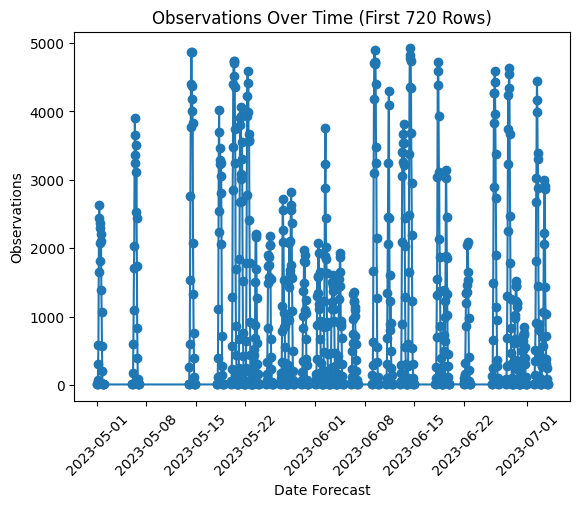

In [63]:
test_pred_all2 = test_pred_all2[:720]

# Extract the 'date_forecast' column from 'test_A' for the first 720 rows
date_forecast = test_A['date_forecast'][:720]

# Create the line plot
plt.plot(date_forecast, test_pred_all2, marker='o', linestyle='-')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date Forecast')
plt.ylabel('Observations')
plt.title('Observations Over Time (First 720 Rows)')

# Show the plot
plt.show()